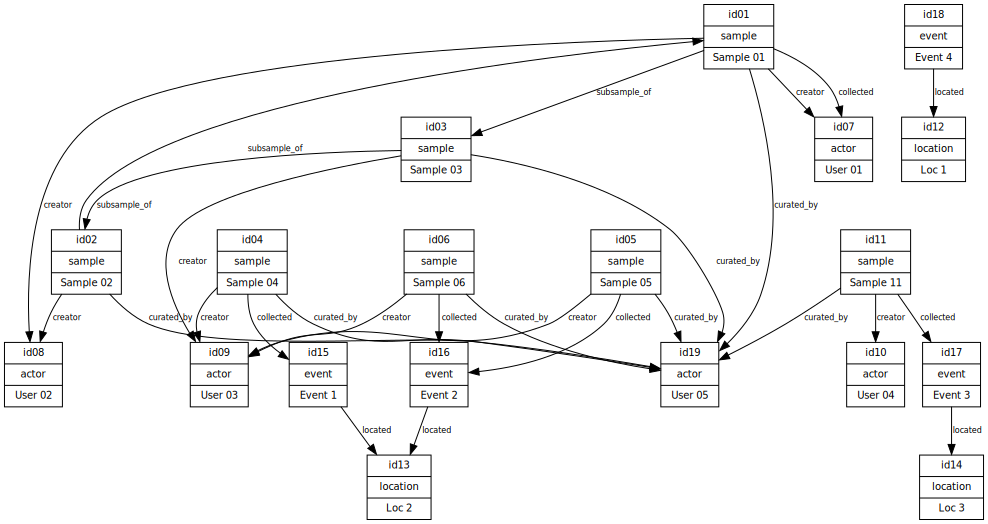

In [5]:
import graphviz
import sqlite3

DB = sqlite3
CNSTR = "test.sqlite3"

def execute(commands):
    with DB.connect(CNSTR) as cn:
        csr = cn.cursor()
        try:
            for s in commands:
                csr.execute(s)
                cn.commit()
        finally:
            csr.close()

sql = [
"DROP TABLE IF EXISTS relation;",
"DROP TABLE IF EXISTS thing;",
"""CREATE TABLE thing (
    id VARCHAR PRIMARY KEY,
    ttype VARCHAR,
    name VARCHAR,
    properties JSON NOT NULL DEFAULT '{}'
);""", 
"""CREATE TABLE relation (
    id int PRIMARY KEY,
    s VARCHAR REFERENCES thing(id),
    o VARCHAR REFERENCES thing(id),
    p VARCHAR,
    properties JSON NOT NULL DEFAULT '{}'
);""",
"""INSERT INTO thing VALUES 
  ('id01', 'sample', 'Sample 01', '{}'),
  ('id02', 'sample', 'Sample 02', '{}'),
  ('id03', 'sample', 'Sample 03', '{}'),
  ('id04', 'sample', 'Sample 04', '{}'),
  ('id05', 'sample', 'Sample 05', '{}'),
  ('id06', 'sample', 'Sample 06', '{}'),
  ('id07', 'actor', 'User 01', '{}'),
  ('id08', 'actor', 'User 02', '{}'),
  ('id09', 'actor', 'User 03', '{}'),
  ('id10', 'actor', 'User 04', '{}'),
  ('id11', 'sample', 'Sample 11', '{}'),
  ('id12', 'location', 'Loc 1', '{"x":-130.2,"y":37.5}'),
  ('id13', 'location', 'Loc 2', '{"x":-150.0,"y":27.5}'),
  ('id14', 'location', 'Loc 3', '{"x":25.0,"y":30.5}'),
  ('id15', 'event', 'Event 1', '{}'),
  ('id16', 'event', 'Event 2', '{}'),
  ('id17', 'event', 'Event 3', '{}'),
  ('id18', 'event', 'Event 4', '{}'),
  ('id19', 'actor', 'User 05', '{}');
""",
"""INSERT INTO relation VALUES 
  (0, 'id01', 'id07', 'creator', '{}'),
  (1, 'id01', 'id08', 'creator', '{}'),
  (2, 'id02', 'id08', 'creator', '{}'),
  (3, 'id03', 'id09', 'creator', '{}'),
  (4, 'id04', 'id09', 'creator', '{}'),
  (5, 'id05', 'id09', 'creator', '{}'),
  (6, 'id06', 'id09', 'creator', '{}'),
  (7, 'id02', 'id01', 'subsample_of', '{}'),
  (8, 'id03', 'id02', 'subsample_of', '{}'),
  (9, 'id11', 'id10', 'creator', '{}'),
  (10, 'id18', 'id12', 'located', '{}'),
  (11, 'id15', 'id13', 'located', '{}'),
  (12, 'id16', 'id13', 'located', '{}'),
  (13, 'id06', 'id16', 'collected', '{}'),
  (14, 'id17', 'id14', 'located', '{}'),
  (15, 'id04', 'id15', 'collected', '{}'),
  (16, 'id05', 'id16', 'collected', '{}'),
  (17, 'id11', 'id17', 'collected', '{}'),
  (18, 'id01', 'id07', 'collected', '{}'),
  (19, 'id01', 'id19', 'curated_by', '{}'),
  (20, 'id02', 'id19', 'curated_by', '{}'),  
  (21, 'id03', 'id19', 'curated_by', '{}'),  
  (22, 'id04', 'id19', 'curated_by', '{}'),  
  (23, 'id05', 'id19', 'curated_by', '{}'),  
  (24, 'id06', 'id19', 'curated_by', '{}'),
  (25, 'id11', 'id19', 'curated_by', '{}'),
  (26, 'id01', 'id03', 'subsample_of', '{}'); 
"""
]
execute(sql)

def doquery(sql, *args):
    with DB.connect(CNSTR) as cn:
        csr = cn.cursor()
        result = csr.execute(sql, *args).fetchall()
    return result

def show_graph(nlights=[], elights=[]):
    nodes = doquery("SELECT id, ttype, name FROM thing;")
    dst = [
        "digraph {", 
        "node [shape=record, fontname=\"JetBrains Mono\", fontsize=10];",
        "edge [fontname=\"JetBrains Mono\", fontsize=8]"
    ]
    for node in nodes:
        color = ''
        if node[0] in nlights:
            color = ',color=red'
        dst.append(f"{node[0]} [label=\"" + "{" + f"{node[0]}|{node[1]}|{node[2]}" + "}\"" + color + "]")
    rels = doquery("SELECT id, s, p, o FROM relation")
    for r in rels:
        color = ''
        if r[0] in elights:
            color = ', color=red'
        dst.append(f"{r[1]} -> {r[3]} [label=\"{r[2]}\"" + color + "]")
    dst.append("}")
    #print("\n".join(dst))
    return graphviz.Source("\n".join(dst))

def sgraph(rows, hcols=[], ecols=[]):
    nh = []
    eh = []
    for row in rows:
        for c in hcols:
            nh.append(row[c])
        for c in ecols:
            eh.append(row[c])
    return show_graph(nlights=nh, elights=eh)

show_graph()